## Предобработка данных

In [98]:
import pandas as pd
import os
import re
pd.set_option('display.max_rows', 500)
import scipy
from scipy.stats import skew
from scipy.stats import kurtosis
import math
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [31]:
df = pd.read_csv('../../data/final_data.csv')

In [32]:
df['salary_from'] = df['salary_from'].fillna(0)
df['salary_to'] = df['salary_to'].fillna(0)
df['salary'] = df.loc[:,'salary_from'] + df.loc[:,'salary_to']
df.loc[(df.salary_from != 0) & (df.salary_to != 0), 'salary'] = df.salary / 2

In [33]:
df.loc[df.gross == False, 'salary'] = df.salary * 0.87

In [34]:
df.dropna(axis = 0, subset = ['currency', 'gross'], inplace = True)

In [35]:
df.drop(['salary_from', 'salary_to', 'gross'], axis = 1, inplace = True)

In [36]:
df.drop('employment', axis = 1, inplace = True) 

In [37]:
df.shape

(30639, 14)

In [38]:
df.isna().sum()

premium                         0
name                            0
response_letter_required        0
city                        10502
latitude                    10367
longtitude                  10367
raw                          9886
experience                      0
schedule                        0
skills                       5989
has_test                        0
employer                        0
currency                        0
salary                          0
dtype: int64

In [39]:
df = df.loc[~(df.salary == 0)]
df = df.loc[~(df.latitude == 0)]
df = df.loc[~(df.longtitude == 0)]
df.loc[(df.salary < 1000) & (df.currency == 'RUR'), 'salary'] = df.loc[(df.salary < 1000) & (df.currency == 'RUR'), 'salary'] * 1000

In [40]:
df.salary.value_counts()

43500.0     1575
52200.0     1408
34800.0     1226
60900.0     1152
87000.0     1103
            ... 
31224.3        1
176000.0       1
20900.0        1
45600.0        1
184875.0       1
Name: salary, Length: 1337, dtype: int64

In [41]:
df.dropna(axis = 0, subset = ['city', 'latitude', 'longtitude'], inplace = True)

In [42]:
df.shape

(20133, 14)

In [43]:
df.to_csv('../../data/final_data_salary.csv', index = False)

## Гипотезы

In [27]:
skills = [i.split('_') for i in df.skills.astype(str)]

In [28]:
skills

[['Деловая переписка',
  'Грамотная речь',
  'входящие звонки',
  'Деловое общение',
  'Консультирование клиентов по телефону',
  'уверенный пользователь ПК'],
 ['Ведение переговоров',
  'Поиск информации в интернет',
  'Анализ рынка',
  'Грамотная речь',
  'Телефонные переговоры'],
 ['Работа в команде',
  'Работа с большим объемом информации',
  'Аналитические исследования',
  'MS PowerPoint',
  'Аналитическое мышление'],
 ['Asterisk',
  'Linux',
  'Администрирование серверов Linux',
  'MS SQL',
  'VoIP',
  '1С: Предприятие 8',
  'SQL Server',
  'Локальные сети',
  'Ремонт ПК',
  'Администрирование сетевого оборудования',
  'Монтаж оборудования',
  'Настройка ПО',
  'Windows Os',
  'Windows Server 2003'],
 ['nan'],
 ['Грамотная речь'],
 ['Управление автопарком грузовых автомобилей. Организация технического обслуживания автомобилей'],
 ['Монтаж оборудования',
  'Электрические системы и слаботочные системы',
  'Техническое обслуживание',
  'Монтаж инженерных систем'],
 ['1С программиров

In [29]:
skills = pd.Series([item for sublist in skills for item in sublist]).value_counts()

In [22]:
skills[skills.index.str.contains('mach', flags=re.IGNORECASE)].head(60)

Machine Learning    28
mach3                1
Mach 3               1
dtype: int64

In [32]:
names = df.name.value_counts()

In [61]:
names.head(50)

Системный администратор                       1114
Токарь                                         795
Программист 1С                                 628
Фрезеровщик                                    505
Механик                                        408
Токарь-универсал                               406
Сервисный инженер                              269
Инженер-программист                            247
Графический дизайнер                           218
Специалист технической поддержки               217
Главный механик                                209
Оператор станков с ЧПУ                         207
Оператор 1C                                    200
Инженер-механик                                193
Программист 1C                                 179
Токарь-расточник                               175
Дизайнер                                       165
Монтажник слаботочных систем                   149
Оператор станка с ЧПУ                          140
Аналитик                       

In [33]:
names[names.index.str.contains('системный адми', flags=re.IGNORECASE)].head(60)

Системный администратор                                                                   1114
Ведущий системный администратор                                                             69
Старший системный администратор                                                             39
Младший системный администратор                                                             30
Системный администратор Linux                                                               29
Системный администратор Windows                                                              8
Сервисный инженер/Системный администратор/Выездной технический специалист                    6
Системный администратор (на сезон)                                                           6
Системный администратор (инженер)                                                            6
Ведущий программист (системный администратор)                                                6
Программист (системный администратор)             

In [44]:
names[names.index.str.contains('тока', flags=re.IGNORECASE)].sum()

2266

In [45]:
names[names.index.str.contains('фрезе', flags=re.IGNORECASE)].sum()

1016

In [34]:
df.skills = df.skills.astype(str)
df.name = df.name.astype(str)

In [104]:
js_skills = df[df.skills.str.contains('Javascri', flags=re.IGNORECASE)]

In [105]:
js_skills.shape

(822, 17)

In [47]:
import numpy as np

In [108]:
js_skills['salary_from'] = js_skills['salary_from'].fillna(0)
js_skills['salary_to'] = js_skills['salary_to'].fillna(0)
js_skills['salary'] = js_skills.loc[:,'salary_from'] + js_skills.loc[:,'salary_to']
js_skills.loc[(js_skills.salary_from != 0) & (js_skills.salary_to != 0), 'salary'] = js_skills.salary / 2

js_skills.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

C:\Users\Denis\AppData\Local\Temp\ipykernel_484\3147198672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  js_skills['salary_from'] = js_skills['salary_from'].fillna(0)
C:\Users\Denis\AppData\Local\Temp\ipykernel_484\3147198672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  js_skills['salary_to'] = js_skills['salary_to'].fillna(0)
C:\Users\Denis\AppData\Local\Temp\ipykernel_484\3147198672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

salary      
                        mean count
experience                        
Более 6 лет         245289.0    19
Нет опыта            73667.0    51
От 1 года до 3 лет  103065.0   475
От 3 до 6 лет       156201.0   277

In [109]:
js_skills.shape

(822, 18)

In [116]:
ones_skills = df[df.skills.str.contains('1с', flags=re.IGNORECASE)]

In [117]:
ones_skills.shape

(2950, 17)

In [118]:
ones_skills['salary_from'] = ones_skills['salary_from'].fillna(0)
ones_skills['salary_to'] = ones_skills['salary_to'].fillna(0)
ones_skills['salary'] = ones_skills.loc[:,'salary_from'] + ones_skills.loc[:,'salary_to']
ones_skills.loc[(ones_skills.salary_from != 0) & (ones_skills.salary_to != 0), 'salary'] = ones_skills.salary / 2

ones_skills.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

C:\Users\Denis\AppData\Local\Temp\ipykernel_484\2360568520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones_skills['salary_from'] = ones_skills['salary_from'].fillna(0)
C:\Users\Denis\AppData\Local\Temp\ipykernel_484\2360568520.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ones_skills['salary_to'] = ones_skills['salary_to'].fillna(0)
C:\Users\Denis\AppData\Local\Temp\ipykernel_484\2360568520.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try u

salary      
                        mean count
experience                        
Более 6 лет         166527.0    73
Нет опыта            59239.0   207
От 1 года до 3 лет   93770.0  1747
От 3 до 6 лет       133308.0   923

In [24]:
df[df.skills.str.contains('английс', flags=re.IGNORECASE)]['salary'].mean()

93191.9803883495

In [25]:
df[~df.skills.str.contains('английс', flags=re.IGNORECASE)]['salary'].mean()

72110.09955325475

In [50]:
tokar = df[df.name.str.contains('токар', flags=re.IGNORECASE)]

In [51]:
tokar.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

salary      
                       mean count
experience                       
Более 6 лет         71205.0    59
Нет опыта           51878.0   176
От 1 года до 3 лет  61459.0  1347
От 3 до 6 лет       63702.0   684

In [62]:
freze = df[df.name.str.contains('механи', flags=re.IGNORECASE)]

In [63]:
freze.groupby("experience").agg({"salary": [np.mean, 'count']}).round(0)

salary      
                       mean count
experience                       
Более 6 лет         72169.0    36
Нет опыта           44524.0   154
От 1 года до 3 лет  56255.0  1261
От 3 до 6 лет       69127.0   868

## Анализ количественных признаков

In [44]:
df = pd.read_csv('../../data/final_data_salary.csv')

In [45]:
df_numeric = df.loc[:, ['latitude', 'longtitude', 'salary']]

In [46]:
df_numeric.describe()

,latitude,longtitude,salary
count,20133.000000,20133.000000,20133.000000
mean,55.034746,50.674378,68385.510156
std,4.112057,23.114345,44471.156199
min,23.608705,-117.780920,739.500000
25%,54.198566,37.544997,40000.000000
50%,55.749506,39.809390,55000.000000
75%,56.837849,57.522901,80970.000000
max,69.496790,158.679625,522000.000000


In [47]:
stats = []

for (i, col) in enumerate(df_numeric.columns):
    val = df_numeric[col]
    
    stats.append ([col, val.mean(), val.median(), val.min(), val.max(), val.std(), 
                     scipy.stats.skew(val, axis=0, bias=True), 
                     kurtosis(val, axis=0, bias=True), 
                     val.quantile(0.05), val.quantile(0.95), 
                     val.quantile(0.75) - val.quantile(0.25),
                     0])

In [48]:
stats = pd.DataFrame(stats, columns=['Переменная', 'Среднее', 'Медиана', 'Минимум', 'Максимум', 
                                     'Ст. Отклонение', 'Асимметрия', 'Эксцесс', 
                                     '5% Проц', '95% Проц', 'Интерквартильный размах', 'Пропущенные наблюдения'])

In [49]:
stats

,Переменная,Среднее,Медиана,Минимум,Максимум,Ст. Отклонение,Асимметрия,Эксцесс,5% Проц,95% Проц,Интерквартильный размах,Пропущенные наблюдения
0,latitude,55.034746,55.749506,23.608705,69.496790,4.112057,-0.999656,2.263413,45.049795,59.971717,2.639283,0
1,longtitude,50.674378,39.809390,-117.780920,158.679625,23.114345,1.799294,3.542513,30.307716,92.981642,19.977904,0
2,salary,68385.510156,55000.000000,739.500000,522000.000000,44471.156199,2.368214,8.599219,26100.000000,156600.000000,40970.000000,0


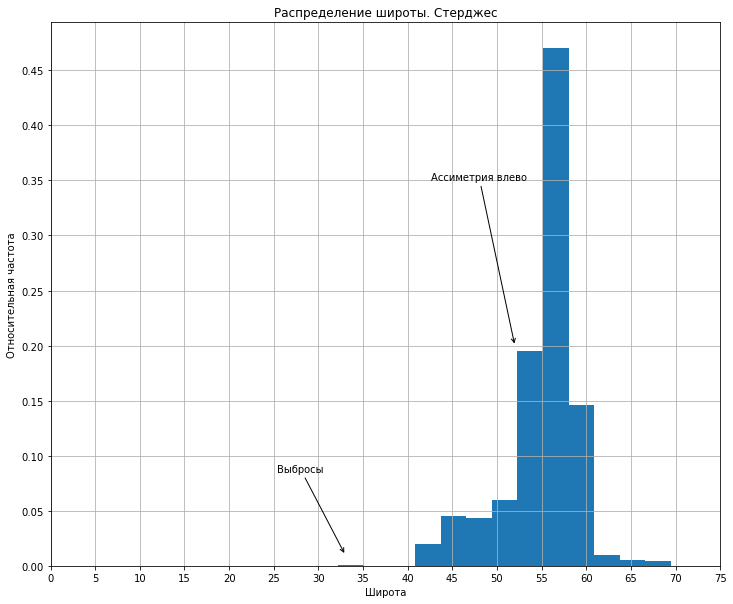

In [50]:
fig, ax = plt.subplots(figsize=(12, 10))
plt.hist(df.latitude, weights = np.ones_like(df.latitude) / len(df.latitude), bins = len(np.histogram_bin_edges(df.latitude, bins='sturges')) - 1) 
plt.ylabel('Относительная частота')
plt.xlabel('Широта')
ax.set_title('Распределение широты. Стерджес')

plt.annotate('Выбросы', xy=(33, 0.01), xytext=(28, 0.085),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('Ассиметрия влево', xy=(52, 0.2), xytext=(48, 0.35),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

ax.xaxis.set_ticks(np.arange(0, 80, 5))
ax.yaxis.set_ticks(np.arange(0, 0.5, 0.05))

ax.grid()
plt.show()

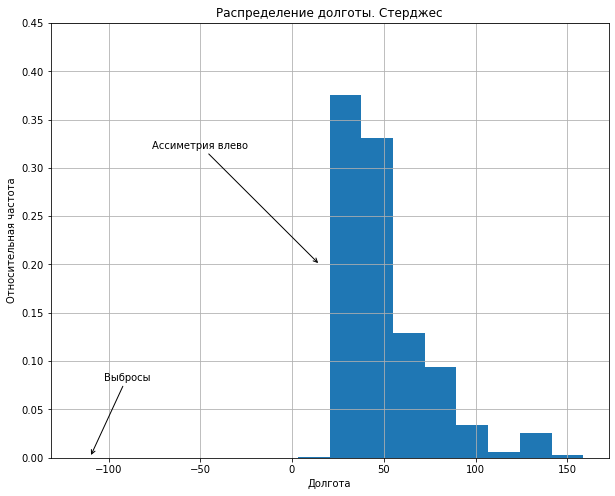

In [51]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.hist(df.longtitude, weights = np.ones_like(df.longtitude) / len(df.longtitude), 
         bins = len(np.histogram_bin_edges(df.longtitude, bins='sturges')) - 1) 
plt.ylabel('Относительная частота')
plt.xlabel('Долгота')
ax.set_title('Распределение долготы. Стерджес')

plt.annotate('Выбросы', xy=(-110, 0.001), xytext=(-90, 0.08),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('Ассиметрия влево', xy=(15, 0.20), xytext=(-50, 0.32),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')


ax.yaxis.set_ticks(np.arange(0, 0.5, 0.05))

ax.grid()
plt.show()

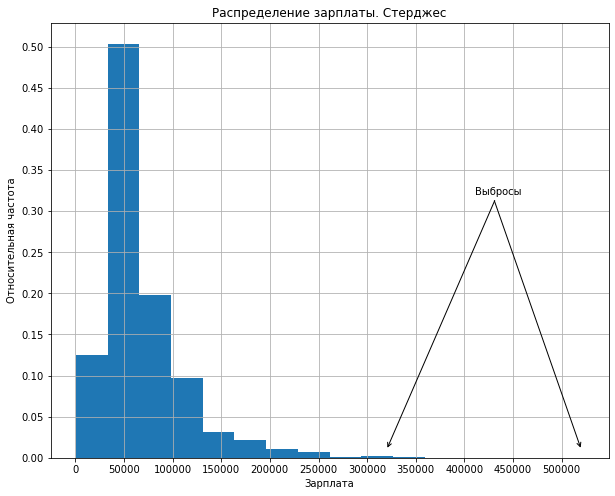

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))

plt.hist(df.salary, weights = np.ones_like(df.salary) / len(df.salary), 
         bins = len(np.histogram_bin_edges(df.salary, bins='sturges')) - 1)

plt.ylabel('Относительная частота')
plt.xlabel('Зарплата')
ax.set_title('Распределение зарплаты. Стерджес')

plt.annotate('Выбросы', xy=(320000, 0.01), xytext=(435000, 0.32),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

plt.annotate('', xy=(520000, 0.01), xytext=(430000, 0.315),
             arrowprops={'arrowstyle':'->'}
             ,horizontalalignment='center')

ax.xaxis.set_ticks(np.arange(0, 550000, 50000))
ax.yaxis.set_ticks(np.arange(0, 0.55, 0.05))

ax.grid()
plt.show()

## Анализ качественных признаков

In [53]:
df.isna().sum()

premium                        0
name                           0
response_letter_required       0
city                           0
latitude                       0
longtitude                     0
raw                            0
experience                     0
schedule                       0
skills                      3934
has_test                       0
employer                       0
currency                       0
salary                         0
dtype: int64

In [54]:
df.describe()

,latitude,longtitude,salary
count,20133.000000,20133.000000,20133.000000
mean,55.034746,50.674378,68385.510156
std,4.112057,23.114345,44471.156199
min,23.608705,-117.780920,739.500000
25%,54.198566,37.544997,40000.000000
50%,55.749506,39.809390,55000.000000
75%,56.837849,57.522901,80970.000000
max,69.496790,158.679625,522000.000000


## Города

В большом количестве(10 тысяч) вакансий город не указан. Такие значения мы заполним категорией "Неизвестно". Города, которые попадаются меньше трех раз мы объеденим в одну категорию "Другие", т.к. в таком случае эта категория получается не такой большой по сравнению с другими категориями. 

In [93]:
import pickle 
import matplotlib.path as mplPath

In [94]:
mapper = {
"Алтайский край":"Южно-Сибирский",
"Республика Алтай":"Южно-Сибирский",
"Курская область":"Центрально-Чернозёмный",
"Тульская область":"Центральный",
"Пермский край":"Волго-Камский",
"Тверская область":"Центральный",
"Липецкая область":"Центрально-Чернозёмный",
"Орловская область":"Центральный",
"Самарская область":"Волго-Уральский",
"Кировская область":"Волго-Камский",
"Брянская область":"Центральный",
"Московская область":"Центральный",
"Смоленская область":"Центральный",
"Рязанская область":"Центральный",
"Калужская область":"Центральный",
"Тамбовская область":"Центрально-Чернозёмный",
"Ростовская область":"Южный",
"Республика Марий Эл":"Волго-Камский",
"Курганская область":"Уральско-Сибирский",
"Мурманская область":"Северно-Западный",
"Республика агестан":"Северно-Кавказский",
"Республика Карелия":"Северно-Западный",
"Ивановская область":"Центральный",
"Кемеровская область":"Южно-Сибирский",
"Вологодская область":"Северно-Западный",
"Магаданская область":"Дальневосточный",
"Республика Татарстан":"Волго-Камский",
"Воронежская область":"Центрально-Чернозёмный",
"Белгородская область":"Центрально-Чернозёмный",
"Ярославская область":"Центральный",
"Ульяновская область":"Волго-Уральский",
"Владимирская область":"Центральный",
"Новосибирская область":"Южно-Сибирский",
"Ленинградская область":"Северно-Западный",
"Астраханская область":"Южный",
"Удмуртская Республика":"Волго-Камский",
"Архангельская область":"Северный",
"Чувашская Республика":"Волго-Камский",
"Республика Калмыкия":"Южный",
"Республика Башкортостан":"Волго-Уральский",
"Республика Саха (Якутия)":"Дальневосточный",
"Кабардино-Балкарская Республика":"Северно-Кавказский",
"Республика Северная Осетия-Алания":"Северно-Кавказский",
"Республика Тыва":"Ангаро-Енисейский",
"Карачаево-Черкесская Республика":"Северно-Кавказский",
"Еврейская автономная область":"Дальневосточный",
"Томская область":"Южно-Сибирский",
"Амурская область":"Дальневосточный",
"Пензенская область":"Волго-Уральский",
"Республика Бурятия":"Дальневосточный",
"Республика Хакасия":"Ангаро-Енисейский",
"Республика Мордовия":"Волго-Камский",
"Саратовская область":"Волго-Уральский",
"Костромская область":"Центральный",
"Республика Ингушетия":"Северно-Кавказский",
"Чеченская Республика":"Северно-Кавказский",
"Калининградская область":"Северно-Западный",
"Псковская область":"Северно-Западный",
"Республика Коми":"Северный",
"Оренбургская область":"Волго-Уральский",
"Новгородская область":"Северно-Западный",
"Челябинская область":"Уральско-Сибирский",
"Ставропольский край":"Северно-Кавказский",
"Свердловская область":"Уральско-Сибирский",
"Волгоградская область":"Южный",
"Республика Адыгея":"Южный",
"Ханты-Мансийский автономный округ":"Уральско-Сибирский",
"Тюменская область":"Уральско-Сибирский",
"Омская область":"Южно-Сибирский",
"Приморский край":"Дальневосточный",
"Хабаровский край":"Дальневосточный",
"Сахалинская область":"Дальневосточный",
"Чукотский автономный округ":"Дальневосточный",
"Красноярский край":"Ангаро-Енисейский",
"Иркутская область":"Ангаро-Енисейский",
"Забайкальский край":"Дальневосточный",
"Камчатский край":"Дальневосточный",
"Ненецкий автономный округ":"Северный",
"Ямало-Ненецкий автономный округ":"Уральско-Сибирский",
"Краснодарский край":"Южный",
"Нижегородская область":"Волго-Камский",
"Unknown" : "Unknown" }

In [95]:
def convert_to_region(lat, long):
    coord = np.array([lat, long])
    for reg, area in loaded_dict.items():
        if area.contains_point(coord):
            return reg
    
    return 'Unknown'

with open('../../data/saved_dictionary.pkl', 'rb') as f:
    loaded_dict = pickle.load(f)
    
l = []
for v in loaded_dict.values():
    l.append(mplPath.Path(np.array(v['0'])))
    
loaded_dict = dict(zip(list(loaded_dict.keys()), l))
df.loc[:, 'Region'] = df.apply(lambda x: convert_to_region(x.latitude, x.longtitude), axis = 1)

df.loc[:, 'Region'] = df.loc[:, "Region"].map(mapper)

In [96]:
df.Region.value_counts()

Центральный               5916
Северно-Западный          2886
Волго-Камский             2263
Уральско-Сибирский        1820
Южно-Сибирский            1769
Волго-Уральский           1415
Южный                     1344
Центрально-Чернозёмный     775
Ангаро-Енисейский          715
Дальневосточный            551
Unknown                    428
Северно-Кавказский         167
Северный                    52
Name: Region, dtype: int64

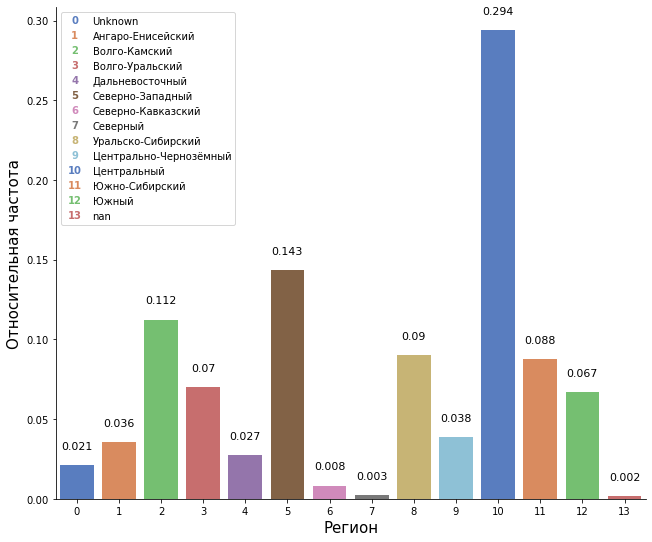

In [111]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

le = preprocessing.LabelEncoder()
encoded = pd.Series(le.fit_transform(df.Region))

df1 = encoded.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent', kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Регион', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = le.transform(le.classes_).astype(str)
labels = le.classes_

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Сопроводительное письмо 

Данная переменная очень сильно не сбалансирована и вакансии, для которых сопроводительное письмо обязательно для ~1% вакансий. 

In [379]:
df.response_letter_required.value_counts()

False    30311
True       328
Name: response_letter_required, dtype: int64

In [380]:
df.response_letter_required = df.response_letter_required.map({False: 0, True: 1}) 

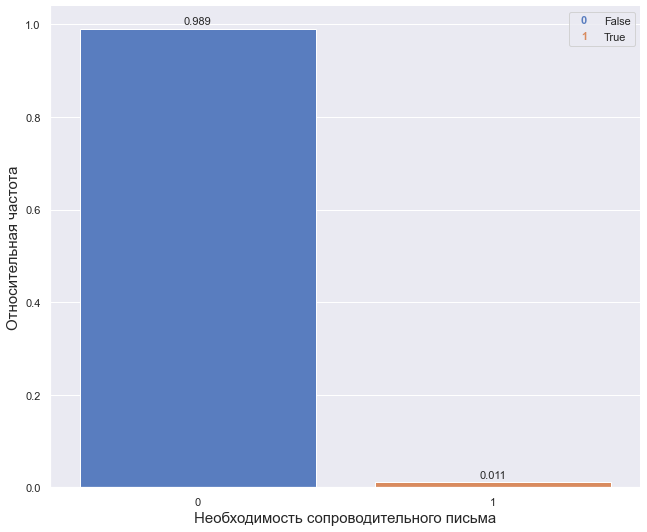

In [474]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
from matplotlib.pyplot import figure

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.response_letter_required.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость сопроводительного письма', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()}) 
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Премиум

Переменная так же очень несбалансирована с ~0.1% вакансий являющихся эксклюзивными для премиум пользователей

In [382]:
df.isna().sum()

premium                         0
name                            0
response_letter_required        0
city                            0
latitude                    10367
longtitude                  10367
raw                          9886
experience                      0
schedule                        0
skills                       5989
has_test                        0
employer                        0
currency                        0
salary                          0
dtype: int64

In [383]:
df.premium.value_counts()

False    30608
True        31
Name: premium, dtype: int64

In [384]:
df.premium = df.premium.map({False: 0, True: 1})

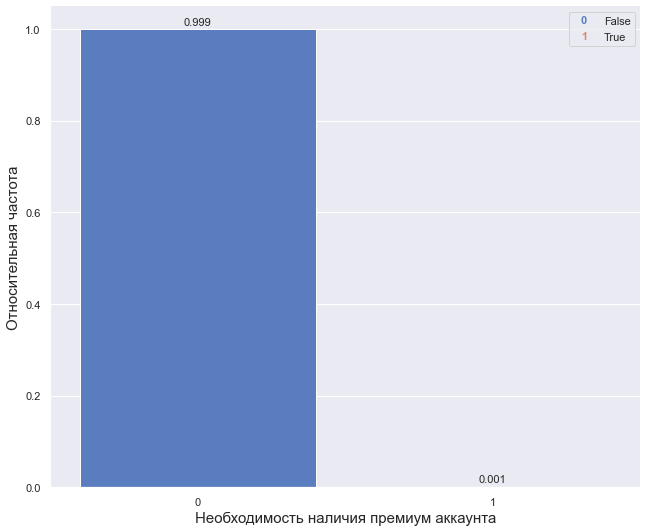

In [475]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.premium.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость наличия премиум аккаунта', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## График работы

График работы имеет сильный дисбаланс, так как подавляющее большинство технических вакансий требуют полный 8 часовой рабочий день, лишь малая часть предлагает удаленную работу 

In [386]:
df.schedule.value_counts()

Полный день         30609
Удаленная работа       22
Сменный график          5
Вахтовый метод          2
Гибкий график           1
Name: schedule, dtype: int64

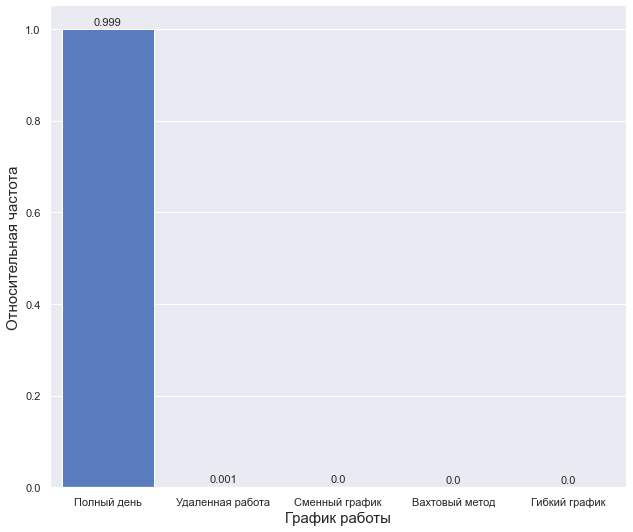

In [476]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.schedule.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('График работы', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Работодатель

In [388]:
df.employer.value_counts()

Ростелеком                 370
Калашников                 120
Первый Бит                 117
МАГНИТ, Розничная сеть     100
Группа компаний Система     90
                          ... 
ВПК-Полимеры                 1
Mekashron                    1
МИТ КИНГ                     1
НЦК                          1
Панацея                      1
Name: employer, Length: 11322, dtype: int64

In [389]:
rare_employer = df['employer'].value_counts()

In [390]:
rare_employer[rare_employer < 2]

Таганрогская Кондитерская Фабрика                   1
Ювента                                              1
Петербургская строительная компания Северо-Запад    1
ПКФ Стройторг                                       1
Ginza Project                                       1
                                                   ..
ВПК-Полимеры                                        1
Mekashron                                           1
МИТ КИНГ                                            1
НЦК                                                 1
Панацея                                             1
Name: employer, Length: 5126, dtype: int64

In [391]:
df.loc[df.employer.isin(rare_employer[rare_employer < 2].index), 'employer'] = 'Другие'

In [392]:
df.employer.value_counts()

Другие                        5126
Ростелеком                     370
Калашников                     120
Первый Бит                     117
МАГНИТ, Розничная сеть         100
                              ... 
ГРАНТ-СИСТЕМЫ И ТЕХНОЛОГИИ       2
Домкомплект                      2
Hant                             2
МПК Петровские деликатесы        2
АСЦ-Климат                       2
Name: employer, Length: 6197, dtype: int64

## Тест

Лишь около 1% вакансий требуют прохождение тестового задания для отклика на вакансию, эта переменная очень не сбалансирована

In [394]:
df.has_test.value_counts()

False    30316
True       323
Name: has_test, dtype: int64

In [395]:
df.has_test = df.has_test.map({False: 0, True: 1})

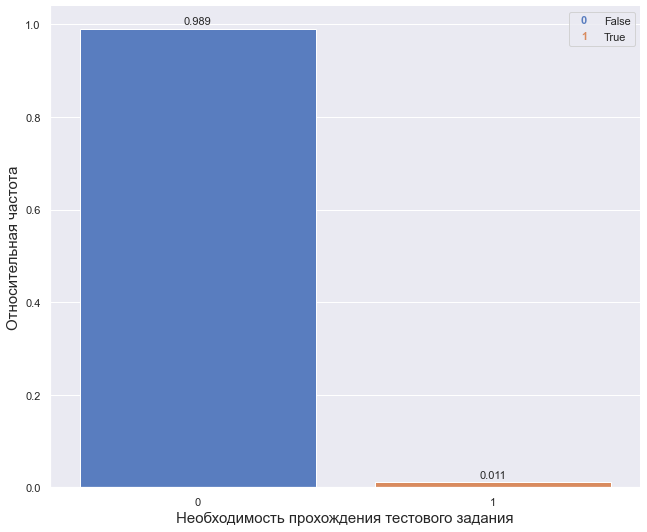

In [477]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]


df1 = df.has_test.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Необходимость прохождения тестового задания', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = ['0', '1']
labels = [ "False", "True"]

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()

## Опыт работы

Требования к опыту работы несбалансированы

In [478]:
df.experience.value_counts()

1    17462
2     8140
0     4353
3      684
Name: experience, dtype: int64

In [479]:
experience_map = {'Нет опыта': 0, 'От 1 года до 3 лет' : 1, 'От 3 до 6 лет': 2, 'Более 6 лет': 3}

In [401]:
df.experience = df.experience.map(experience_map)

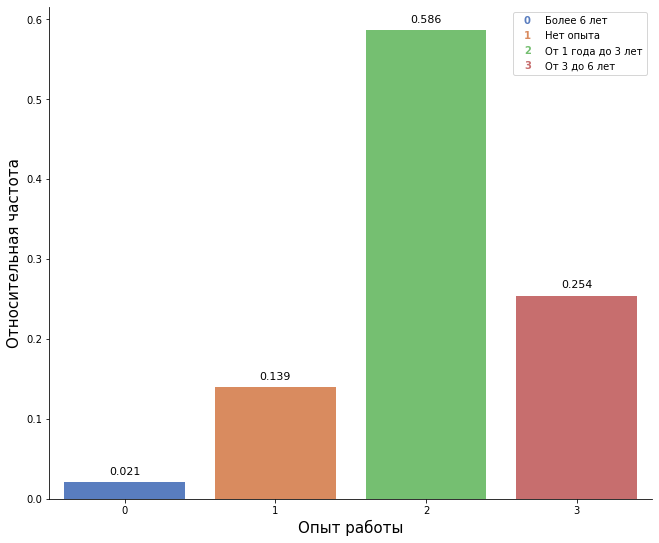

In [110]:
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text

class TextHandler(HandlerBase):
    def create_artists(self, legend, tup ,xdescent, ydescent,
                        width, height, fontsize,trans):
        tx = Text(width/2.,height/2,tup[0], fontsize=fontsize,
                  ha="center", va="center", color=tup[1], fontweight="bold")
        return [tx]

le = preprocessing.LabelEncoder()
encoded = pd.Series(le.fit_transform(df.experience))
    
df1 = encoded.value_counts(normalize=True)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='index', y='percent',kind='bar', data=df1, palette='muted')

g.ax.set_xlabel('Опыт работы', fontsize = 15)
g.ax.set_ylabel('Относительная частота', fontsize = 15)

for rect in g.ax.patches:
    g.ax.text (rect.get_x() + rect.get_width()  / 2, rect.get_height() + 0.01, round(rect.get_height(), 3), horizontalalignment='center', fontsize = 11)

handltext = le.transform(le.classes_).astype(str)
labels = le.classes_

t = g.ax.get_xticklabels()
labeldic = dict(zip(handltext, labels))
labels = [labeldic[h.get_text()]  for h in t]
handles = [(h.get_text(),c.get_fc()) for h,c in zip(t,g.ax.patches)]

g.ax.legend(handles, labels, handler_map={tuple : TextHandler()})
g.fig.set_figwidth(10)
g.fig.set_figheight(8)

plt.show()